In [ ]:
!pip install pypianoroll

In [ ]:
!pip install pygame

In [ ]:
!pip install pretty_midi

In [2]:
import numpy as np
import pypianoroll
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt
import pretty_midi
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import pygame
import os
import pickle
import subprocess

%matplotlib inline

import matplotlib

import seaborn as sns


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Parse a MIDI file to a `pypianoroll.Multitrack` instance

multitrack = Multitrack('./data/rock.mid')
for idx, track in enumerate(multitrack.tracks):
    pianoroll = track.pianoroll


#print (multitrack.beat_resolution,)
num_track = len(multitrack.tracks)
downbeats = multitrack.get_downbeat_steps()
#print (downbeats,num_track)

In [31]:
pianoroll.shape

(5664, 128)

In [32]:
pianoroll

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
# drum had only 47 keyname.
# For details https://www.midi.org/specifications/item/gm-level-1-sound-set

pianoroll_drum = np.asarray([ pianoroll[i][35:82] for i in range(0,pianoroll.shape[0]) ])
print (pianoroll_drum.shape)

print (pianoroll_drum)



(5664, 47)
[[ 0 90  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


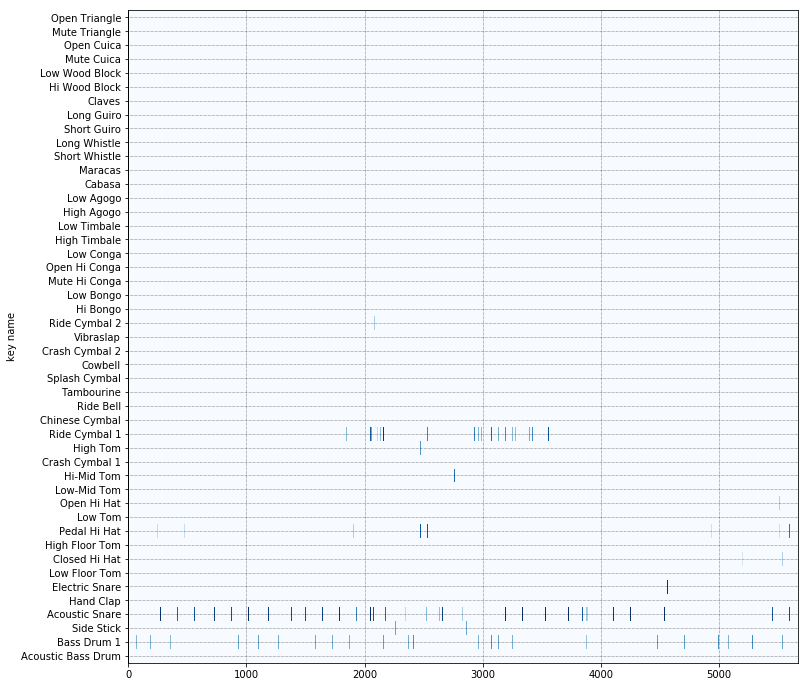

In [4]:
def plot_drum(q):
    fig, ax = plt.subplots(figsize=(12,12))
    axs = [ax]
    ax.set_yticks(np.arange(0,47))
    drum_label = [pretty_midi.note_number_to_drum_name(i) for i in range(128)]
    ax.set_yticklabels( drum_label[35:82])
    ax.set_ylabel("key name")
    ax.grid(
                axis="both", color="k", linestyle=":", linewidth=0.5
            )
    for step in downbeats:
        ax.axvline(x=step, color="k", linewidth=1)

    to_plot = q.T
    ax.imshow(
                to_plot,
                cmap='Blues',
                aspect="auto",
                vmin=0,
                vmax=127,
                origin="lower",
                interpolation="none",
            )


    fig.show()
    
plot_drum(pianoroll_drum)
    

In [ ]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12,12))
axs = [ax]
cmaps = ("Blues", "Greens")
pypianoroll.plot_pianoroll(
                axs[0],
                pianoroll_drum,
                True,
                24,
                downbeats,
                preset="default",
                cmap=cmaps[0 % len(cmaps)],
                xtick="step",
                            ytick="pitch", 
                            yticklabel="name"
            )

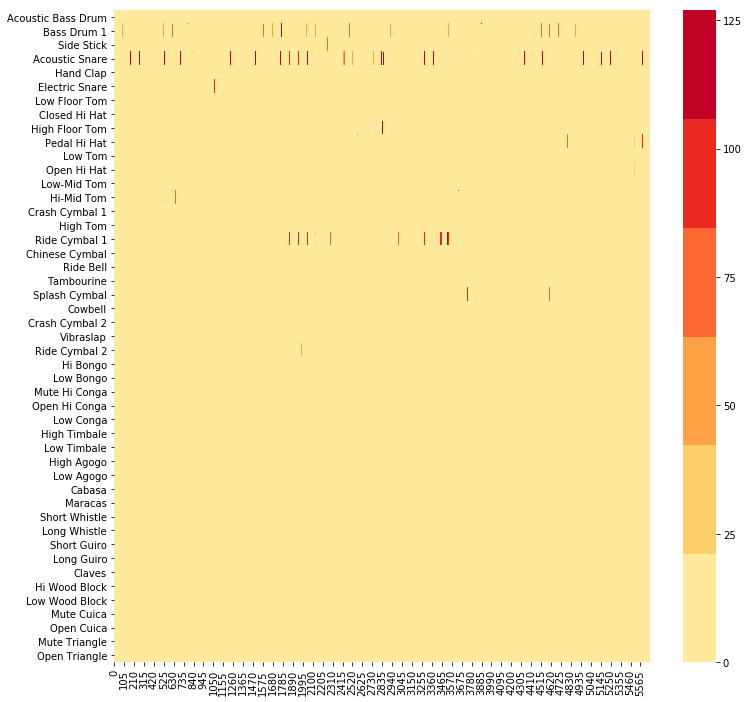

In [5]:
plt.subplots(figsize=(12,12))
drum_label = [pretty_midi.note_number_to_drum_name(i) for i in range(128)]

sns.heatmap(pianoroll_drum.T, cmap = sns.color_palette("YlOrRd"), yticklabels=drum_label[35:82])


In [6]:
pypianoroll.save_animation(
    'img/ani.gif',
    pianoroll_drum,
    100,hop=100,
    fps=12)

t:   8%|▊         | 4/48 [00:00<00:01, 35.94it/s, now=None]

MoviePy - Building file img/ani.gif with imageio.


![Annimation of drum](img/ani.gif)

In [ ]:
# follow installation of midi2ly
# http://manpages.ubuntu.com/manpages/trusty/man1/midi2ly.1.html
# follow installation of LilyPond
# https://zoomadmin.com/HowToInstall/UbuntuPackage/lilypond
# http://lilypond.org/doc/v2.19/Documentation/topdocs/INSTALL.html

In [7]:

def midi2ly(midifile,output):
    c = 'midi2ly -x --allow-tuplet=8*1/3 "{0}" -o "{1}"'.format(midifile, output)
    print ('Executing: ' + c)
    p = subprocess.Popen(c, shell=True).wait()
    return True

In [8]:
def to_pdf(title):
    """ Requires LilyPond added to PATH."""

    c = 'lilypond -fpdf -o "{0}" "{1}.ly"'.format(title, title)
    print ('Executing: ' + c)
    p = subprocess.Popen(c, shell=True).wait()
    os.remove(title + '.ly')
    return True

In [9]:
midi2ly("./data/rock.mid", "./data/rock.ly") 

Executing: midi2ly -x --allow-tuplet=8*1/3 "./data/rock.mid" -o "./data/rock.ly"


True

In [10]:
to_pdf("./data/rock")

Executing: lilypond -fpdf -o "./data/rock" "./data/rock.ly"


True

In [10]:
#Viewing music - via https://github.com/cuthbertLab/music21/issues/306 ?
from IPython.core.display import display, HTML, Javascript
import json, random
def showScore(score):
    xml = open(score.write('musicxml')).read()
    showMusicXML(xml)
    
def showMusicXML(xml):
    DIV_ID = "OSMD-div-"+str(random.randint(0,1000000))
    #print("DIV_ID", DIV_ID)
    msg='loading OpenSheetMusicDisplay'
    msg=''
    display(HTML('<div id="'+DIV_ID+'">{}</div>'.format(msg)))
    
    #print('xml length:', len(xml))

    script = """
    console.log("loadOSMD()");
    function loadOSMD() { 
        return new Promise(function(resolve, reject){

            if (window.opensheetmusicdisplay) {
                console.log("already loaded")
                return resolve(window.opensheetmusicdisplay)
            }
            console.log("loading osmd for the first time")
            // OSMD script has a 'define' call which conflicts with requirejs
            var _define = window.define // save the define object 
            window.define = undefined // now the loaded script will ignore requirejs
            var s = document.createElement( 'script' );
            s.setAttribute( 'src', "https://cdn.jsdelivr.net/npm/opensheetmusicdisplay@0.3.1/build/opensheetmusicdisplay.min.js" );
            //s.setAttribute( 'src', "/custom/opensheetmusicdisplay.js" );
            s.onload=function(){
                window.define = _define
                console.log("loaded OSMD for the first time",opensheetmusicdisplay)
                resolve(opensheetmusicdisplay);
            };
            document.body.appendChild( s ); // browser will try to load the new script tag
        }) 
    }
    loadOSMD().then((OSMD)=>{
        console.log("loaded OSMD",OSMD)
        var div_id = "{{DIV_ID}}";
            console.log(div_id)
        window.openSheetMusicDisplay = new OSMD.OpenSheetMusicDisplay(div_id);
        openSheetMusicDisplay
            .load({{data}})
            .then(
              function() {
                console.log("rendering data")
                openSheetMusicDisplay.render();
              }
            );
    })
    """.replace('{{DIV_ID}}',DIV_ID).replace('{{data}}',json.dumps(xml))
    display(Javascript(script))
    return DIV_ID


In [11]:
from music21 import converter
melody = converter.parse("data/rock.mid")
melody.show('midi')

showScore(melody)

<IPython.core.display.Javascript object>

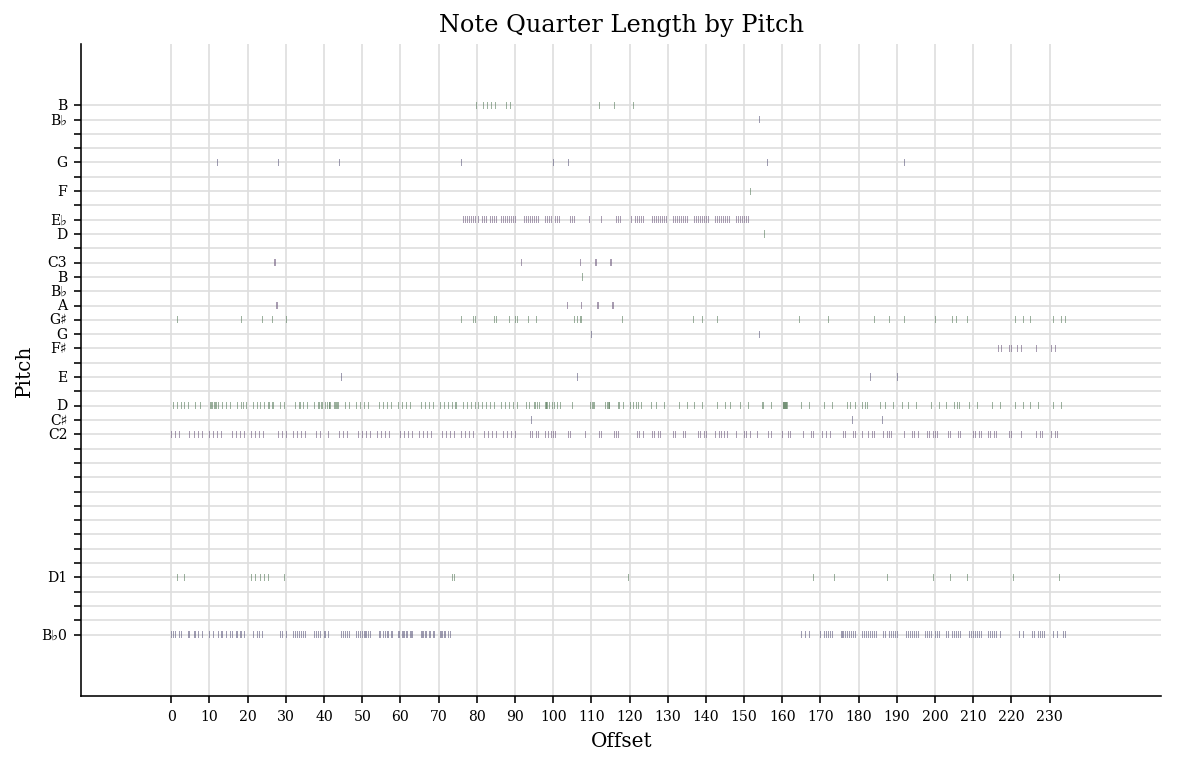

In [13]:
melody.plot()

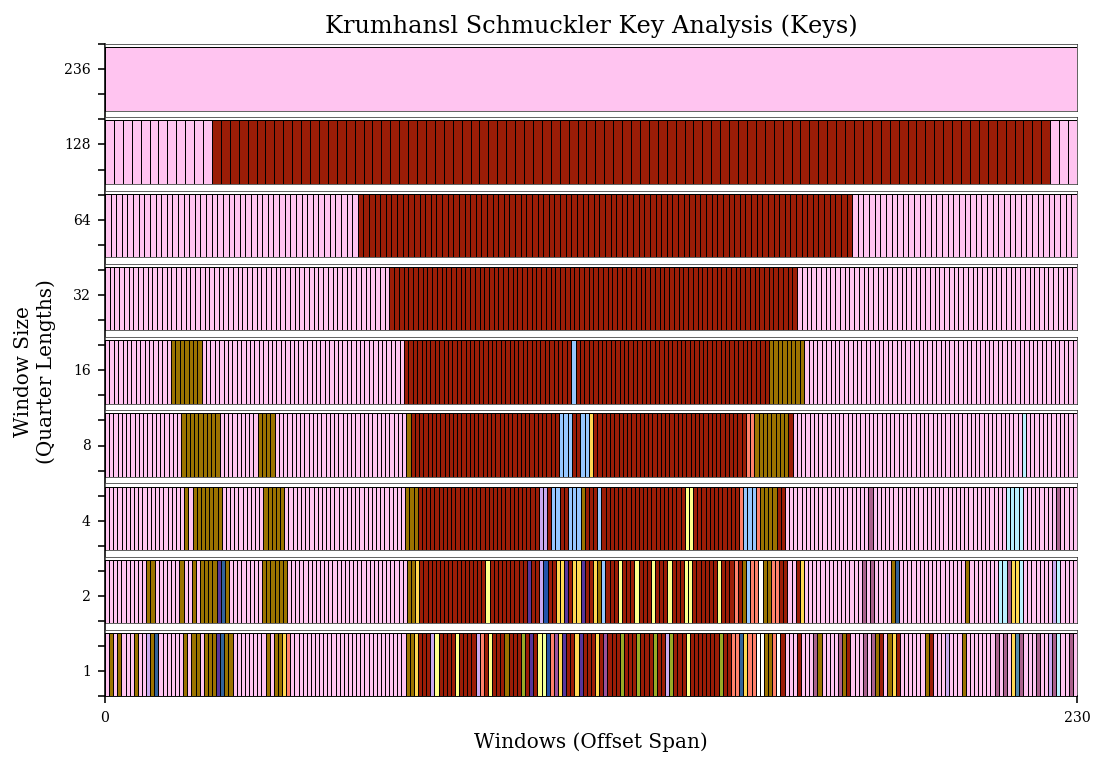

In [14]:
#https://ccrma.stanford.edu/~craig/papers/01/icmc01-harmony-2up.pdf
melody.plot('key')

In [17]:
melody.measures(10, 15).analyze('key')

<music21.key.Key of g minor>

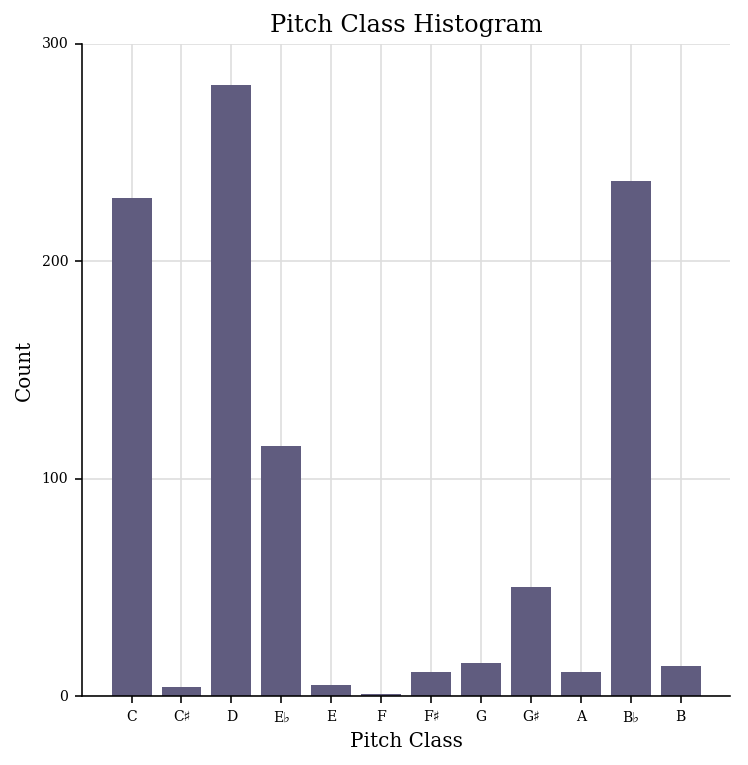

In [16]:
melody.plot('histogram', 'pitchClass')

In [6]:
from music21.midi import percussion
from music21 import pitch

midi = converter.parse("data/rock.mid")
s2 = instrument.partitionByInstrument(midi)
notes_to_parse = midi.flat.notes
pm = percussion.PercussionMapper()
notes = []
for element in notes_to_parse:
    if isinstance(element, note.Note):
        #print(element.pitch)
        midiNumber = element.pitch.midi
        if midiNumber>=35 and midiNumber<=81:
            try:
                #bassDrum1Pitch = pitch.Pitch(midiNumber)
                #mapping = pm.midiPitchToInstrument(bassDrum1Pitch)
                notes.append(midiNumber)
            except:
                pass

            
print (notes)


[38, 38, 38, 44, 38, 38, 38, 38, 38, 38, 38, 38, 38, 36, 38, 38, 38, 44, 38, 48, 48, 45, 45, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 38, 38, 38, 38, 38, 59, 51, 36, 59, 59, 36, 59, 59, 36, 51, 36, 59, 59, 59, 38, 38, 44, 38, 48, 48, 48, 48, 51, 38, 37, 38, 38, 38, 51, 36, 38, 38, 38, 51, 36, 36, 51, 38, 38, 38, 51, 38, 38, 48, 48, 48, 45, 45, 38, 51, 38, 38, 38, 38, 38, 47, 36, 51, 38, 43, 38, 38, 38, 48, 48, 45, 45, 51, 38, 43, 38, 38, 38, 48, 48, 45, 45, 36, 38, 51, 38, 44, 38, 38, 43, 36, 38, 37, 38, 38, 51, 51, 38, 38, 51, 51, 38, 51, 51, 51, 51, 51, 44, 51, 51, 51, 51, 44, 51, 51, 51, 36, 51, 38, 51, 36, 51, 51, 48, 36, 45, 36, 58, 43, 36, 38, 38, 50, 45, 55, 36, 38, 36, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 36, 38, 38, 38, 36, 38, 44, 36, 36, 44, 42, 36, 38, 37, 36, 36, 38, 38, 38, 37, 38, 38, 38, 38, 38, 38, 42, 42, 42]


In [19]:
print('Installing dependencies...')

!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -q pyfluidsynth
!pip install -U -q magenta

Installing dependencies...
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)


In [13]:
import collections
import sys
import tempfile

from magenta.music import constants
from magenta.music.protobuf import music_pb2
import pretty_midi
import six
import tensorflow.compat.v1 as tf

In [37]:
midi = pretty_midi.PrettyMIDI(("data/rock1.mid"))


sequence = music_pb2.NoteSequence()
print (sequence)

In [81]:
from magenta.music import midi_io
notes = midi_io.midi_file_to_note_sequence("data/rock1.mid")
print (notes)


#from magenta.music import note_sequence_io
#a = midi_io.midi_file_to_sequence_proto("data/rock1.mid")
#a.collection_name = os.path.basename("data")
#a.filename = "rock1.mid"
#a.id = note_sequence_io.generate_note_sequence_id(a.filename, a.collection_name, 'midi')


#with note_sequence_io.NoteSequenceRecordWriter("notes.tf") as writer:
#     writer.write(a)

ticks_per_quarter: 480
time_signatures {
  numerator: 4
  denominator: 4
}
key_signatures {
}
tempos {
  qpm: 97.9999836666694
}
notes {
  pitch: 48
  velocity: 56
  start_time: 0.1326530833333333
  end_time: 0.1900510520833333
  is_drum: true
}
notes {
  pitch: 48
  velocity: 85
  start_time: 0.1900510520833333
  end_time: 0.2321428958333333
  is_drum: true
}
notes {
  pitch: 50
  velocity: 127
  start_time: 0.27423473958333333
  end_time: 0.37500006249999995
  is_drum: true
}
notes {
  pitch: 48
  velocity: 102
  start_time: 0.3954082291666666
  end_time: 0.4961735520833333
  is_drum: true
}
notes {
  pitch: 37
  velocity: 66
  start_time: 0.5612245833333332
  end_time: 0.66198990625
  is_drum: true
}
notes {
  pitch: 40
  velocity: 116
  start_time: 0.73852053125
  end_time: 0.8392858541666666
  is_drum: true
}
notes {
  pitch: 40
  velocity: 127
  start_time: 0.9017858645833332
  end_time: 1.0025511875
  is_drum: true
}
notes {
  pitch: 44
  velocity: 77
  start_time: 1.19387775
  

In [69]:
## plot of pitch
import magenta.music as mm
mm.plot_sequence(a)

Loading BokehJS ...

In [82]:
from music21 import converter, instrument, note, chord, stream
pm1 = midi_io.note_sequence_to_pretty_midi(notes)
midi_stream = stream.Stream(pm1)
midi_stream.write('midi', fp='output.mid')

'output.mid'

In [29]:
## works with wav and mp3 files

import librosa
import numpy as np
from magenta.music.protobuf import music_pb2
def audio_tap_to_note_sequence(f, velocity_threshold=30):
    y, sr = librosa.load(f)
     # pad the beginning to avoid errors with onsets right at the start
    y = np.concatenate([np.zeros(1000),y])
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    # try to guess reasonable tempo
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    onset_frames = librosa.onset.onset_detect(y, sr, units='frames')
    onset_times = librosa.onset.onset_detect(y, sr, units='time')
    start_time = onset_times[0]
    onset_strengths = librosa.onset.onset_strength(y, sr)[onset_frames]
    normalized_onset_strengths = onset_strengths / np.max(onset_strengths)
    onset_velocities = np.int32(normalized_onset_strengths * 127)
    note_sequence = music_pb2.NoteSequence()
    note_sequence.tempos.add(qpm=tempo)
    for onset_vel, onset_time in zip(onset_velocities, onset_times):
        if onset_vel > velocity_threshold and onset_time >= start_time:  # filter quietest notes
            note_sequence.notes.add(
            instrument=9, pitch=42, is_drum=True,
            velocity=onset_vel,  # use fixed velocity here to avoid overfitting
            start_time=onset_time - start_time,
            end_time=onset_time - start_time)

    return note_sequence
b = audio_tap_to_note_sequence("rock.wav")
print (b)

tempos {
  qpm: 129.19921875
}
notes {
  pitch: 42
  velocity: 89
  instrument: 9
  is_drum: true
}
notes {
  pitch: 42
  velocity: 106
  start_time: 0.06965986394557823
  end_time: 0.06965986394557823
  instrument: 9
  is_drum: true
}
notes {
  pitch: 42
  velocity: 127
  start_time: 0.4643990929705215
  end_time: 0.4643990929705215
  instrument: 9
  is_drum: true
}



In [74]:
import IPython
IPython.display.Audio("output.mid",rate=22050)

In [4]:
import os
import pretty_midi
from scipy.io import wavfile 
import IPython

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten, Dropout, Activation
from tensorflow.keras import backend as K
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import glob

n_x = 79
max_T_x = 1000
sequence_length = 20
T_y_generated = 200


midiFile_l = ['159_soul_98_beat_4-4.mid', '144_soul_105_fill_4-4.mid', '146_soul_105_fill_4-4.mid']


In [ ]:
X_list = []

for midiFile in midiFile_l:
    # read the MIDI file
    midi_data = pretty_midi.PrettyMIDI("./midi_songs/"+midiFile)
    note_l = [note.pitch for note in midi_data.instruments[0].notes]
    #print (note_l)
    # convert to one-hot-encoding
    T_x = len(note_l)
    if T_x > max_T_x:
        T_x = max_T_x
    X_ohe = np.zeros((T_x, n_x))
    print (X_ohe.shape)
    for t in range(T_x): 
         X_ohe[t, note_l[t]-1] = 1
    # add to the list  
    X_list.append(X_ohe)
    
print(len(X_list))
print(X_list[0].shape)
print(X_list[1].shape)
print(X_list[2].shape)

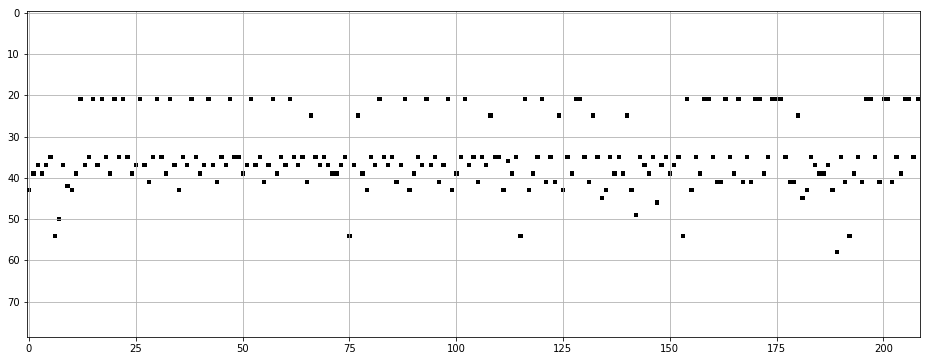

In [6]:
plt.figure(figsize=(16, 6))
plt.imshow(X_list[0].T, aspect='auto')
plt.set_cmap('gray_r')
plt.grid(True)

In [18]:
note_l

def create_midi(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    drum_program = pretty_midi.instrument_name_to_program('SteelDrums')
    drum = pretty_midi.Instrument(program=drum_program)
    time = 0
    step = 0.1
    for note_number in notes:
        myNote = pretty_midi.Note(velocity=100, pitch=int(note_number), start=time, end=time+step)
        drum.notes.append(myNote)
        time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(note_l)
new_midi_data.write('final.mid')

In [26]:

import pygame

def play_music(music_file):
    """
    stream music with mixer.music module in blocking manner
    this will stream the sound from disk while playing
    """
    clock = pygame.time.Clock()
    try:
        pygame.mixer.music.load(music_file)
        print ("Music file %s loaded!" % music_file)
    except pygame.error:
        print ("File %s not found! (%s)" % (music_file, pygame.get_error()))
        return
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        # check if playback has finished
        clock.tick(30)
# pick a midi music file you have ...
# (if not in working folder use full path)

def play_midi(midi_file):
    freq = 44100    # audio CD quality
    bitsize = -16   # unsigned 16 bit
    channels = 2    # 1 is mono, 2 is stereo
    buffer = 1024    # number of samples
    pygame.mixer.init(freq, bitsize, channels, buffer)

    # optional volume 0 to 1.0
    pygame.mixer.music.set_volume(0.8)
    try:
        play_music(midi_file)
    except KeyboardInterrupt:
        # if user hits Ctrl/C then exit
        # (works only in console mode)
        pygame.mixer.music.fadeout(1000)
        pygame.mixer.music.stop()
        raise SystemExit


In [28]:
from magenta.music import midi_io
midi = pretty_midi.PrettyMIDI(("final.mid"))

a = midi_io.midi_file_to_note_sequence("data/rock1.mid")
sequence = music_pb2.NoteSequence()
#print (a)
play_music("final.mid")

Music file final.mid loaded!
